# <a name="0.0"></a>Содержание:
* [Описание проекта](#0.)
    - [Описание данных](#0.1.)
    - [Таймлайн](#0.2.)
* [Импорт библиотек](#1.)
* [Глобальные параметры](#2.)
* [Загрузка данных](#3.)
* [Предварительный анализ](#4.)
* [Формирование новых признаков](#5.)
* [Построение модели](#6.)
    - [Деление данных](#6.1.)
    - [Градиентный бустинг](#6.2.)
    - [Случайный лес](#6.3.)
    - [k-neighbors](#6.4.)
    - [Логистическая регрессия](#6.5.)
* [Использование модели](#7.)
* [Описание решения](#8.)

<a name="0."></a>
# Описание проекта

## Сервис ранжирования предложений Auto Avia Offer

Цель создания такого продукта — это автоматизация процесса подбора и отправки вариантов перелета  в ответ на соответствующую заявку. Ожидается, что автоматизация процесса формирования оффера дополнительно разгрузит агентов.

Те. нужно создать сервис ранжирования предложений. Сервис, принимая в себя данные о компании, сотруднике + набор вариантов (200-300 наборов рейсов с ценами) должен уметь ранжировать варианты от наиболее релевантного выбора к наименьшему. Участники конкурса должны проанализировать миллионы вариантов перелетов из истории поисков и заказов билетов в Time, историю поисков и предложений, чтобы создать модель сортировки вариантов по вероятности выбора клиентом.

Необходимо реализовать сервис ранжирования, основанный на правилах ранжирования, например: смесь правил (предложить самый недорогой, в СПБ только прямые и т.п.) + обучаемая на основе базы данных запросов (BIG DATA Аэроклуб) и предложений, сформированных вручную.

Необходимо заложить возможность развития сервиса вне рамок текущего Технического задания, а именно оставить возможность будущей разработки: 

Учет имеющихся и новых данных, полезных для увеличения качества работы системы. 
Учет действий агентов по ранжированию таких вариантов в системах бронирования. 
Возможность дообучения модели ранжирования разметчиком.

<font size="2">([к содержанию](#0.0))</font>

<a name="0.1."></a>

# Описание данных:
Исходные данные хранятся в 2 таблицах:
- RequestAgent.xlsx
- RequestClient.xlsx

Каждая из таблиц имеет следующие поля:

| Параметр | Описание | Агент | Клиент | Пример | Описание примера |
| --- | --- | --- | --- | --- | --- |
| RequestID | ID запроса | + | + | | |
| EmployeeId | ID агента, оформляющего заявку | + | - | | |
| RequestDate | Дата запроса | + | + | | |
| ClientID | ID компании клиента | + | + | | |
| TravellerGrade  ClientGrade| Грейд сотрудника | + | + | | |
| SearchRoute | Маршрут | + | + | MOWLED  MOWKZN/KZNMOW | MOW varchar(3) - код города/аэропорта вылета  LED varchar(3) - код города/аэропорта прилета если поиска туда-обратно, через "/"  еще пара кодов |
| RequestDepartureDate | Дата вылета | + | + | | |
| RequestReturnDate | Дата возвращения | + | + | | |
| FligtOption | Маршрут | + | + | S71051 DMEKZN 2022.09.28/S71054 KZNDME 2022.10.02	| S71051 varchar(6) - код авиакомпании varchar(2) и номер рейса varchar(3) DMEKZN Пара кодов аэропортов 2022.09.28 дата перелета далее через "/" остальные перелеты по варианту в ответе |
| DepartureDate | Время вылета (туда) | + | + | | |
| ArrivalDate | Время прилёта (туда) | + | + | | |
| ReturnDepatrureDate | Время вылета (оттуда) | + | + | | |
| ReturnArrivalDate | Время прилёта (оттуда) | + | + | | |
| SegmentCount | Количество сегментов в маршрутe | + | + | | |
| Amount | Стоимость| + | + | | |
| class | Класс перевозки | + | + | | F - Первый класс  B - Бизнесс класс  Е - Эконом |
| IsBaggage | наличие бесплатного багажа | + | + |  | 1 - есть  0 - нет |
| isRefundPermitted | возможность обмена | + | + |  | 1 - есть  0 - нет  NULL - нет информации |
| isExchangePermitted | возможность возврата | + | + |  | 1 - есть 0 - нет NULL - нет информации |
| isDiscount | стоимость со скидкой | + | + |  | 1 - Да 0 - Нет |
| InTravelPolicy | разрешено использовать по политике клиента | + | + |  | 1 - Да  0 - Нет |
| FrequentFlyer | наличие бонусной карты у путешественника | - | + | SU/S7	| список кодов авиакомпаний varhar(2), на которые у путешественника есть бонусная карта |
| SentOption/SelectedVariant | Вариант добавлен в Offer | + | + | | |

<font size="2">([к содержанию](#0.0))</font>

<a name="0.2."></a>

# Таймлайн

| Дата | Время | Описание | Ссылка | Пароль |
| --- | --- | --- | --- | --- |
| 05.05 | 18:00 | митап с экспертами по задачам хакатона | [ссылка](https://us06web.zoom.us/rec/play/mgAyZzIX37cvAB_jOwo5SCIRkXmWRdSWOxgm6JHf_F1bVIPTq5SqxV2Mb8vDwTFR0xZqs-OFkO_FyjHn.95jeMQ1xFXfAf_rZ?canPlayFromShare=true&from=share_recording_detail&continueMode=true&componentName=rec-play&originRequestUrl=https%3A%2F%2Fus06web.zoom.us%2Frec%2Fshare%2F0gEEmDUicJnoyfjfVe3b6FTbJMKKIBgXuxBR9TUSuP8_tq-BsuYeVWa3arKopnXF.9Qtl1xprSXaudhYd) | 2GYDBc#H |
| 12.05 | 19:00 | открытие хакатона, публикация полной информации о задаче | | |
| 13.05 | 13:00 | Чекпоинт №1 | [ссылка](https://us06web.zoom.us/rec/component-page?action=viewdetailpage&sharelevel=meeting&useWhichPasswd=meeting&clusterId=us06&componentName=need-password&meetingId=bQd7LXZ52PX1ZUesEToYO3PCpEgpKmi1jWiqfeZmHMy20dcG2qGnkaw5E07Km6Qa.I2SrLXOCYfySBqmB&originRequestUrl=https%3A%2F%2Fus06web.zoom.us%2Frec%2Fshare%2FthxjDgxndEu3sOp76WIUl4D3nq4Y_nH_d8Dz6hzgpuMErU8fcjqWpKV4pwbm_PBF.5hTQpKFsYLHSL4bI) | 1Ty9WY%A |
| 18.05 | 19:00 | Чекпоинт №2 |  | |
| 22.05 | 19:00 | Чекпоинт №3 |  | |
| 24.05 | 19:00 | Окончание загрузки решений | | |
| 27.05 | 13:00 | Питчинги проектов | [1 трек](https://us06web.zoom.us/rec/component-page?action=viewdetailpage&sharelevel=meeting&useWhichPasswd=meeting&clusterId=us06&componentName=need-password&meetingId=QQi0ib6bDxH9srEBWs3TdovFYGRmMThemsy91LqAUY3ndfkIZI9cfcbTDVNZ8dTm.TuBCGJDNZsPtU_qj&originRequestUrl=https%3A%2F%2Fus06web.zoom.us%2Frec%2Fshare%2FiF6jTiR05lJu4vnK2feRMusQvbOI5g8mbh7rU7ZNUvC12gHR5Wwcy0jiJ5mhnl62.l-h15zkk0J4We55Y) | tMiQWP*9 |
| 27.05 | 18:00 | Закрытие и награждение победителей |  | |

<font size="2">([к содержанию](#0.0))</font>

<a name="1."></a>

# Импорт библиотек

<font size="2">([к содержанию](#0.0))</font>

In [1]:
import os
from joblib import dump, load
import pickle
import datetime as dt
from collections import defaultdict

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from catboost import CatBoostClassifier, Pool, cv
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

<a name="2."></a>
# Глобальные параметры

<font size="2">([к содержанию](#0.0))</font>

In [2]:
data_folder = 'Data'
models_folder = 'Models'
submit_folder = 'Submits'

agent_requests_file = os.path.join(data_folder, 'RequestAgent.xlsx')
client_requests_file = os.path.join(data_folder, 'RequestClient.xlsx')
locations_file = os.path.join(data_folder, 'Locations_UTC.xlsx')
submit_file = os.path.join(submit_folder, 'submit.xlsx')

datetime_format = '%Y-%m-%d %H:%M:%S.%f'
date_format = '%Y.%m.%d'

<a name="3."></a>
# Загрузка данных

<font size="2">([к содержанию](#0.0))</font>

In [3]:
agent_requests = pd.read_excel(agent_requests_file, engine='openpyxl')

In [4]:
agent_requests.head(5)

,RequestID,EmployeeId,RequestDate,ClientID,TravellerGrade,SearchRoute,RequestDepartureDate,RequestReturnDate,FligtOption,DepartureDate,ArrivalDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SentOption
0,4175300,2086,2022-06-01 02:49:18.297,40811,NaN,TJMLED/LEDTJM,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,5N0578 TJMLED 2022.06.14/SU6449 LEDTJM 2022.06.15,2022-06-14 07:40:00.000,2022-06-14 08:50:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,14356.0,E,0.0,1.0,1.0,0,1,0
1,4175300,2086,2022-06-01 02:49:18.297,40811,NaN,TJMLED/LEDTJM,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,SU6452 TJMLED 2022.06.14/SU6449 LEDTJM 2022.06.15,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,23712.0,E,1.0,1.0,1.0,0,0,0
2,4175300,2086,2022-06-01 02:49:18.297,40811,NaN,TJMLED/LEDTJM,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,SU6452 TJMLED 2022.06.14/SU6449 LEDTJM 2022.06.15,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,21485.0,E,1.0,1.0,1.0,1,0,0
3,4175300,2086,2022-06-01 02:49:18.297,40811,NaN,TJMLED/LEDTJM,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,SU6452 TJMLED 2022.06.14/SU6449 LEDTJM 2022.06.15,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,18212.0,E,1.0,1.0,NaN,0,0,0
4,4175300,2086,2022-06-01 02:49:18.297,40811,NaN,TJMLED/LEDTJM,2022-06-14 05:45:00.000,2022-06-15 13:00:00.000,SU6452 TJMLED 2022.06.14/SU6449 LEDTJM 2022.06.15,2022-06-14 05:45:00.000,2022-06-14 06:55:00.000,2022-06-15 13:00:00.000,2022-06-15 17:55:00.000,2,17360.0,E,1.0,1.0,1.0,1,1,0


In [5]:
agent_requests.tail(5)

,RequestID,EmployeeId,RequestDate,ClientID,TravellerGrade,SearchRoute,RequestDepartureDate,RequestReturnDate,FligtOption,DepartureDate,ArrivalDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,SentOption
637397,6465990,2060,2022-12-30 16:21:57.110,26390,ЦП4,TASMOW,2023-02-08 00:00:00.000,NaN,SU1871 TASSVO 2023.02.08,2023-02-08 03:45:00.000,2023-02-08 06:20:00.000,NaN,NaN,1,15899.0,E,1.0,NaN,NaN,1,1,0
637398,6465990,2060,2022-12-30 16:21:57.110,26390,ЦП4,TASMOW,2023-02-08 00:00:00.000,NaN,SU1871 TASSVO 2023.02.08,2023-02-08 03:45:00.000,2023-02-08 06:20:00.000,NaN,NaN,1,15899.0,E,1.0,NaN,NaN,0,1,0
637399,6465990,2060,2022-12-30 16:21:57.110,26390,ЦП4,TASMOW,2023-02-08 00:00:00.000,NaN,UT0806 TASVKO 2023.02.08,2023-02-08 18:30:00.000,2023-02-08 20:55:00.000,NaN,NaN,1,19591.0,E,1.0,NaN,NaN,0,1,0
637400,6465990,2060,2022-12-30 16:21:57.110,26390,ЦП4,TASMOW,2023-02-08 00:00:00.000,NaN,UT0806 TASVKO 2023.02.08,2023-02-08 18:30:00.000,2023-02-08 20:55:00.000,NaN,NaN,1,23011.0,E,1.0,NaN,NaN,0,1,0
637401,6466281,5372,2022-12-30 17:26:24.517,40811,4,NBCRMZ/RMZNBC,2023-01-05 00:00:00.000,2023-02-02 00:00:00.000,RT0445 NBCRMZ 2023.01.05/RT0446 RMZNBC 2023.02.02,2023-01-05 10:30:00.000,2023-01-05 14:30:00.000,2023-02-02 09:20:00.000,2023-02-02 09:00:00.000,2,12616.0,E,1.0,NaN,NaN,0,1,1


In [6]:
client_requests = pd.read_excel(client_requests_file, engine='openpyxl')

In [7]:
client_requests.head()

,RequestID,RequestDate,ClientID,ClientGrade,SearchRoute,RequestDepartureDate,RequestReturnDate,FligtOption,DepartureDate,ArrivaDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,FrequentFlyer,SelectedVariant
0,4178519,2022-06-01 09:55:44.810,24604,NaN,MOWSVX,2022-06-15 00:00:00.000,NaN,SU6907 SVOSVX 2022.06.15,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,3925.0,E,0,NaN,NaN,1,1,NaN,0
1,4178519,2022-06-01 09:55:44.810,24604,NaN,MOWSVX,2022-06-15 00:00:00.000,NaN,SU6907 SVOSVX 2022.06.15,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,4351.0,E,0,NaN,NaN,0,1,NaN,0
2,4178519,2022-06-01 09:55:44.810,24604,NaN,MOWSVX,2022-06-15 00:00:00.000,NaN,SU6907 SVOSVX 2022.06.15,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,5925.0,E,1,NaN,NaN,1,1,NaN,0
3,4178519,2022-06-01 09:55:44.810,24604,NaN,MOWSVX,2022-06-15 00:00:00.000,NaN,SU6907 SVOSVX 2022.06.15,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,6351.0,E,1,NaN,NaN,0,1,NaN,0
4,4178519,2022-06-01 09:55:44.810,24604,NaN,MOWSVX,2022-06-15 00:00:00.000,NaN,SU6907 SVOSVX 2022.06.15,2022-06-15 14:05:00.000,2022-06-15 18:35:00.000,NaN,NaN,1,9900.0,E,1,NaN,NaN,1,0,NaN,0


In [8]:
client_requests.tail()

,RequestID,RequestDate,ClientID,ClientGrade,SearchRoute,RequestDepartureDate,RequestReturnDate,FligtOption,DepartureDate,ArrivaDate,ReturnDepatrureDate,ReturnArrivalDate,SegmentCount,Amount,class,IsBaggage,isRefundPermitted,isExchangePermitted,isDiscount,InTravelPolicy,FrequentFlyer,SelectedVariant
991988,6009597,2022-11-15 11:35:07.277,40811,4,MOWKZN,2022-11-20 21:00:00.000,NaN,SU1194 SVOKZN 2022.11.20,2022-11-20 18:05:00.000,2022-11-20 19:45:00.000,NaN,NaN,1,4649.0,E,0,1.0,1.0,1,1,NaN,0
991989,6009597,2022-11-15 11:35:07.277,40811,4,MOWKZN,2022-11-20 21:00:00.000,NaN,SU1194 SVOKZN 2022.11.20,2022-11-20 18:05:00.000,2022-11-20 19:45:00.000,NaN,NaN,1,6649.0,E,1,1.0,1.0,0,1,NaN,0
991990,6009597,2022-11-15 11:35:07.277,40811,4,MOWKZN,2022-11-20 21:00:00.000,NaN,SU1194 SVOKZN 2022.11.20,2022-11-20 18:05:00.000,2022-11-20 19:45:00.000,NaN,NaN,1,6649.0,E,1,1.0,1.0,1,1,NaN,0
991991,6009597,2022-11-15 11:35:07.277,40811,4,MOWKZN,2022-11-20 21:00:00.000,NaN,SU1194 SVOKZN 2022.11.20,2022-11-20 18:05:00.000,2022-11-20 19:45:00.000,NaN,NaN,1,10109.0,E,1,0.0,NaN,1,0,NaN,0
991992,6009597,2022-11-15 11:35:07.277,40811,4,MOWKZN,2022-11-20 21:00:00.000,NaN,SU1194 SVOKZN 2022.11.20,2022-11-20 18:05:00.000,2022-11-20 19:45:00.000,NaN,NaN,1,10949.0,E,1,1.0,NaN,0,0,NaN,0


In [9]:
client_requests.shape

(991993, 22)

In [10]:
cities_df = pd.read_excel(locations_file, engine='openpyxl', sheet_name='City')
aeroports_df = pd.read_excel(locations_file, engine='openpyxl', sheet_name='Airport')

In [11]:
class City:
    def __init__(self, idx, name, name_english, country, code, timeZone):
        self.idx = idx
        self.name = name
        self.name_english = name_english
        self.country = country
        self.code = code
        self.timeZone = timeZone
        self.aeroports = []

    def __str__(self):
        aeroports = ', '.join(x.name for x in self.aeroports)
        return f'{self.name} - {self.name_english} ({self.idx}|{self.code}|{self.country}|{aeroports}) {self.timeZone}'

    def __repr__(self):
        return self.__str__()

    
class Aeroport:
    def __init__(self, idx, city, name, name_english, code):
        self.idx = idx
        self.city = city
        self.name = name
        self.name_english = name_english
        self.code = code

    def __str__(self):
        return f'{self.name} - {self.name_english} ({self.idx}|{self.code}|{self.city.name})'

    def __repr__(self):
        return self.__str__()

In [12]:
cities_idx = {}
cities_code = {}
aeroports = {}

for idx, country, name, name_english, code, timeZone in cities_df.values:
    city = City(idx, name, name_english, country, code, timeZone)
    cities_idx[idx] = city
    cities_code[code] = city

for idx, cityIdx, name, name_english, code in aeroports_df.values:
    try:
        city = cities_idx[cityIdx]
        aeroport = Aeroport(idx, city, name, name_english, code)
        city.aeroports.append(aeroport)
        aeroports[code] = aeroport
    except:
        print('Нет города для аэропорта', name)

Нет города для аэропорта СЕВЕРО ЭВЕНСК


<a name="4."></a>
# Предварительный анализ

<font size="2">([к содержанию](#0.0))</font>

In [13]:
# Ищем общие заявки
first_request_id = set(agent_requests['RequestID'].values)
second_request_id = set(client_requests['RequestID'].values)
matches_id = first_request_id & second_request_id
print(f'Было найдено {len(matches_id)} заявок, присутствующих в обоих таблицах')

Было найдено 4 заявок, присутствующих в обоих таблицах


Количество выполненных заявок: 14448


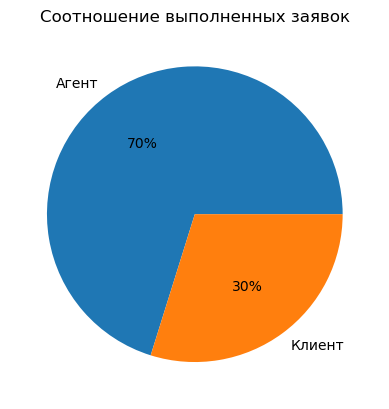

In [14]:
plt.pie(
    [len(first_request_id), len(second_request_id)],
    labels = ['Агент', 'Клиент'], autopct='%.0f%%'
)
plt.title('Соотношение выполненных заявок')
print('Количество выполненных заявок:', len(first_request_id) + len(second_request_id))
plt.show()

<a name="5."></a>
# Формирование новых признаков

<font size="2">([к содержанию](#0.0))</font>

In [15]:
def simple_pipeline_agent_client(agent, client):
    '''
    Простое пробразование с использованием только данных по агенту и по клиенту
    '''
    
    # Переименовываем столбцы для единообразия
    agent = agent.rename(columns={
        'FligtOption': 'FlightOption',
    })

    client = client.rename(columns={
        'ClientGrade': 'TravellerGrade',
        'FligtOption': 'FlightOption',
        'ArrivaDate': 'ArrivalDate',
        'SelectedVariant': 'SentOption'
    })
    
    # Преобразуем форматы времени
    for df in (agent, client):
        for column in [
            'RequestDate',
            'RequestDepartureDate', 'RequestReturnDate',
            'DepartureDate', 'ArrivalDate',
            'ReturnDepatrureDate', 'ReturnArrivalDate'
        ]:
            transform_date(df, column)

    # Объединяем всё в единый DataFrame
    df = pd.concat([
        agent.drop(['EmployeeId'], axis=1),
        client
    ])
    
    splitted_df = transform_df(df)
    
    # Формируем дополнительные признаки
    add_simple_features(splitted_df)
    
    # Заполняем пропуски
    splitted_df['TravellerGrade'] = splitted_df['TravellerGrade'].fillna(-1)
    # Заложим что билеты невозвратный и без обмена, если он не определён
    splitted_df['isRefundPermitted'] = splitted_df['isRefundPermitted'].fillna(0)
    splitted_df['isExchangePermitted'] = splitted_df['isRefundPermitted'].fillna(0)
    
    # Кодируем категориальные признаки
    # Кодируем грейды
    enc_grade = OrdinalEncoder()
    splitted_df['TravellerGrade'] = splitted_df['TravellerGrade'].astype('str')
    splitted_df[['TravellerGrade']] = enc_grade.fit_transform(splitted_df[['TravellerGrade']])

    # кодируем класс перелёта
    enc_class = OrdinalEncoder()
    splitted_df[['class']] = enc_class.fit_transform(splitted_df[['class']])

    # кодируем перевозящую компанию
    enc_flight_company = OrdinalEncoder()
    splitted_df[['FlightCompany']] = enc_flight_company.fit_transform(splitted_df[['FlightCompany']])
    
    encoders = {
        'TravellerGrade': enc_grade,
        'class': enc_class,
        'FlightCompany': enc_flight_company
    }
    
    # Оставим только нужные признаки
    x_columns = [
        'RequestID',              # -1
        'ClientID',               # 0
        'TravellerGrade',         # 1
        'From',                   # 2
        'To',                     # 3
        'FlightCompany',          # 4
        'FlightDuration',         # 5
        'SegmentCount',           # 6
        'DeltaActualRequest',     # 7
        'DepartureDateDayOfWeek', # 8
        'ArrivalDateDayOfWeek',   # 9
        'Amount',                 # 10
        'class',                  # 11
        'IsBaggage',              # 12
        'isRefundPermitted',      # 13
        'isExchangePermitted',    # 14
        'isDiscount',             # 15
        'InTravelPolicy',         # 16
    ]
    cat_features = [0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16]
    y_columns = ['SentOption']

    return splitted_df[x_columns], splitted_df[y_columns], cat_features, encoders

In [16]:
def add_simple_features(df):
    '''
    Добавляем простые признаки:
        - Разница между фактическим вылётом и запрашиваемым в секундах
        - Время полёта в часах
        - Обозначение перевозящей компании
        - День недели для вылета
        - День недели для прилёта
    '''
    df['DeltaActualRequest'] = (df['DepartureDate'] - df['RequestDepartureDate']).dt.seconds
    df['FlightDuration'] = df['FlightDuration'].dt.seconds // 3600
    df['FlightCompany'] = df.FlightOption.apply(lambda x: x[:2])
    df['DepartureDateDayOfWeek'] = df['DepartureDate'].dt.dayofweek
    df['ArrivalDateDayOfWeek'] = df['ArrivalDate'].dt.dayofweek

In [17]:
def transform_date(df, column, format_=datetime_format):
    df[column] = pd.to_datetime(df[column], format=format_)

In [18]:
def transform_df(df):
    '''Делим DataFrame на отдельные направления'''
    # Сформированные строки
    one_way_df = []
    # Проходим по каждой строке
    for index in range(len(df)):
        row = df.iloc[index]
        
        # Вычленяем направления
        splitted_routes = row['SearchRoute'].split('/')
        # Вычленяем сегменты
        splitted_flight_option = row['FlightOption'].split('/')
        
        # Проходим по каждому маршруту, 0 - туда, 1 - обратно
        for i, search_route in enumerate(splitted_routes):
            # Определяем города, откуда куда
            # !!! Может стоит добавить признак указания аэропорта
            try:
                from_name = search_route[:3]
                from_city = get_city(from_name)
            except Exception as e:
                print(f'Точка отправления {from_name} не найдена')
                continue

            try:
                to_name = search_route[3:]
                to_city = get_city(to_name)
            except Exception as e:
                print(f'Точка прибытия {to_name} не найдена')
                continue

            # Какие самолёты, использовались в данном направлении
            flight_options = []
            try:
                while len(splitted_flight_option) > 0:
                    # Берём путь
                    path = splitted_flight_option.pop(0)
                    # Компания, маршрут, дата отправления
                    number, direction, time = path.split()
                    flight_options.append(path)
                    # Если конечная точка маршрута совпадает с местом прибытия,
                    # значит мы долетеле до места назначения
                    to_aeroport = aeroports[direction[3:]]
                    if to_aeroport in to_city.aeroports:
                        break
            except Exception as e:
                print(e)
                continue

            # Цену вычисляем пропорционально количеству затраченных сегментов
            # !!! Можно просто поделить пополам
            ammount = row['Amount'] * len(flight_options) / row['SegmentCount']

            # Правильно побвиваем даты
            if i == 0:
                request_departure_date = row['RequestDepartureDate']
                departure_date = row['DepartureDate']
                arrival_date = row['ArrivalDate']
            elif i == 1:
                request_departure_date = row['RequestReturnDate']
                departure_date = row['ReturnDepatrureDate']
                arrival_date = row['ReturnArrivalDate']

            # Вычисляем длительность полёта
            try:
                duration = calculate_duration(departure_date, arrival_date, from_city, to_city)
            except Exception as e:
                print(e, from_city, to_city)

            # Добавляем всё в правильной последовательности
            one_way_df.append([
                row['RequestID'],
                row['RequestDate'],
                row['ClientID'],
                row['TravellerGrade'],
                from_city.idx,
                to_city.idx,
                request_departure_date,
                '/'.join(flight_options),
                len(flight_options),
                departure_date,
                arrival_date,
                duration,
                ammount,
                row['class'],
                row['IsBaggage'],
                row['isRefundPermitted'],
                row['isExchangePermitted'],
                row['isDiscount'],
                row['InTravelPolicy'],
#                 row['FrequentFlyer'],

                row['SentOption'],
            ])

    return pd.DataFrame(
        data=one_way_df,
        columns=[
            'RequestID',
            'RequestDate',
            'ClientID',
            'TravellerGrade',
            'From',
            'To',
            'RequestDepartureDate',
            'FlightOption',
            'SegmentCount',
            'DepartureDate',
            'ArrivalDate',
            'FlightDuration',
            'Amount',
            'class',
            'IsBaggage',
            'isRefundPermitted',
            'isExchangePermitted',
            'isDiscount',
            'InTravelPolicy',
#             'FrequentFlyer',

            'SentOption',
        ]
    )

In [19]:
def get_city(name):
    '''
    Получаем город из столбцов From, To
    '''
    name = name.strip()
    if name in cities_code.keys():
        return cities_code[name]
    if name in aeroports.keys():
        return aeroports[name].city
    raise Exception

In [20]:
def calculate_duration(departure, arrival, from_city, to_city):
    '''
    Вычисляем длительность полёта:
    
    Arguments:
        - departure - местое время вылета
        - arrival - местное время прибытия
        - город отправления
        - город прибытия
    '''
    departure_with_tz = departure - dt.timedelta(hours=from_city.timeZone) 
    arrival_with_tz = arrival - dt.timedelta(hours=to_city.timeZone) 
    
    return (arrival_with_tz - departure_with_tz)

In [21]:
def historical_pipeline_agent(df):
    '''
    Пробразование с использованием только данных по агенту и исторических данных
    '''
    return df

In [22]:
def historical_pipeline_agent_client(df):
    '''
    Пробразование с использованием только данных по агенту и по клиенту и исторических данных
    '''
    return df

In [23]:
%%time
simple_x, simple_y, simple_cats, simple_encoders = simple_pipeline_agent_client(agent_requests, client_requests)

'КЯС'
'КЯС'
Точка прибытия ЧАР не найдена
Точка отправления СЕН не найдена
Точка отправления СЕН не найдена
'КЯС'
'КЯС'
Точка прибытия СЕН не найдена
Точка отправления СЕН не найдена
Точка прибытия СЕН не найдена
Точка отправления СЕН не найдена
Точка прибытия СЕН не найдена
Точка отправления СЕН не найдена
'ТИО'
'ТИО'
'ТИО'
'ТИО'
'ТИО'
'ТИО'
Точка отправления ЧАР не найдена
Точка отправления ЧАР не найдена
Точка прибытия НЖГ не найдена
Точка прибытия БОЧ не найдена
Точка отправления БОЧ не найдена
Точка отправления СЕН не найдена
CPU times: total: 7min 9s
Wall time: 7min 11s


In [24]:
all_history = pd.merge(simple_x, simple_y, left_index=True, right_index=True)

In [25]:
array_encoders = {
    'TravellerGrade': simple_encoders['TravellerGrade'].categories_[0].tolist(),
    'class': simple_encoders['class'].categories_[0].tolist(),
    'FlightCompany': simple_encoders['FlightCompany'].categories_[0].tolist()
}

In [26]:
def get_neighbors(target, history):
    grade = target['TravellerGrade']
    from_idx = target['From']
    to_idx = target['To']
    company = target['FlightCompany']
    duration = target['FlightDuration']
    segment_count = target['SegmentCount']
    Class = target['class']
    IsBaggage = target['IsBaggage']
    isRefundPermitted = target['isRefundPermitted']
    isExchangePermitted = target['isExchangePermitted']
    isDiscount = target['isDiscount']
    InTravelPolicy = target['InTravelPolicy']
    
    new_history = history.rename({'class': 'FlightClass'}, axis=1)
    result = new_history.query(
        'TravellerGrade == @grade ' +
        'and ' +
        'From == @from_idx '+
        'and ' +
        'To == @to_idx ' +
        'and ' +
        'FlightCompany == @company ' +
        'and ' +
        'FlightDuration == @duration ' +
        'and ' +
        'SegmentCount == @segment_count ' +
        'and ' +
        'FlightClass == @Class ' +
        'and ' +
        'IsBaggage == @IsBaggage ' +
        'and ' +
        'isRefundPermitted == @isRefundPermitted ' +
        'and ' +
        'isExchangePermitted == @isExchangePermitted ' +
        'and ' +
        'isDiscount == @isDiscount ' +
        'and ' +
        'InTravelPolicy == @InTravelPolicy'
    )
    return result[result['RequestID'] != target['RequestID']]

In [27]:
%%time
count_neightbors = []
for i in simple_y[simple_y['SentOption'] == 1].index:
    target_x = simple_x.loc[i]
    target_y = simple_y.loc[i]['SentOption']
    neightbors = get_neighbors(target_x, all_history)
    if neightbors.shape[0] > 0:
        previous_result = neightbors['SentOption'].mean()
    else:
        previous_result = -1
    count_neightbors.append((i, target_y, neightbors.shape[0], previous_result))

CPU times: total: 4h 10min 48s
Wall time: 3h 39min 33s


<Axes: >

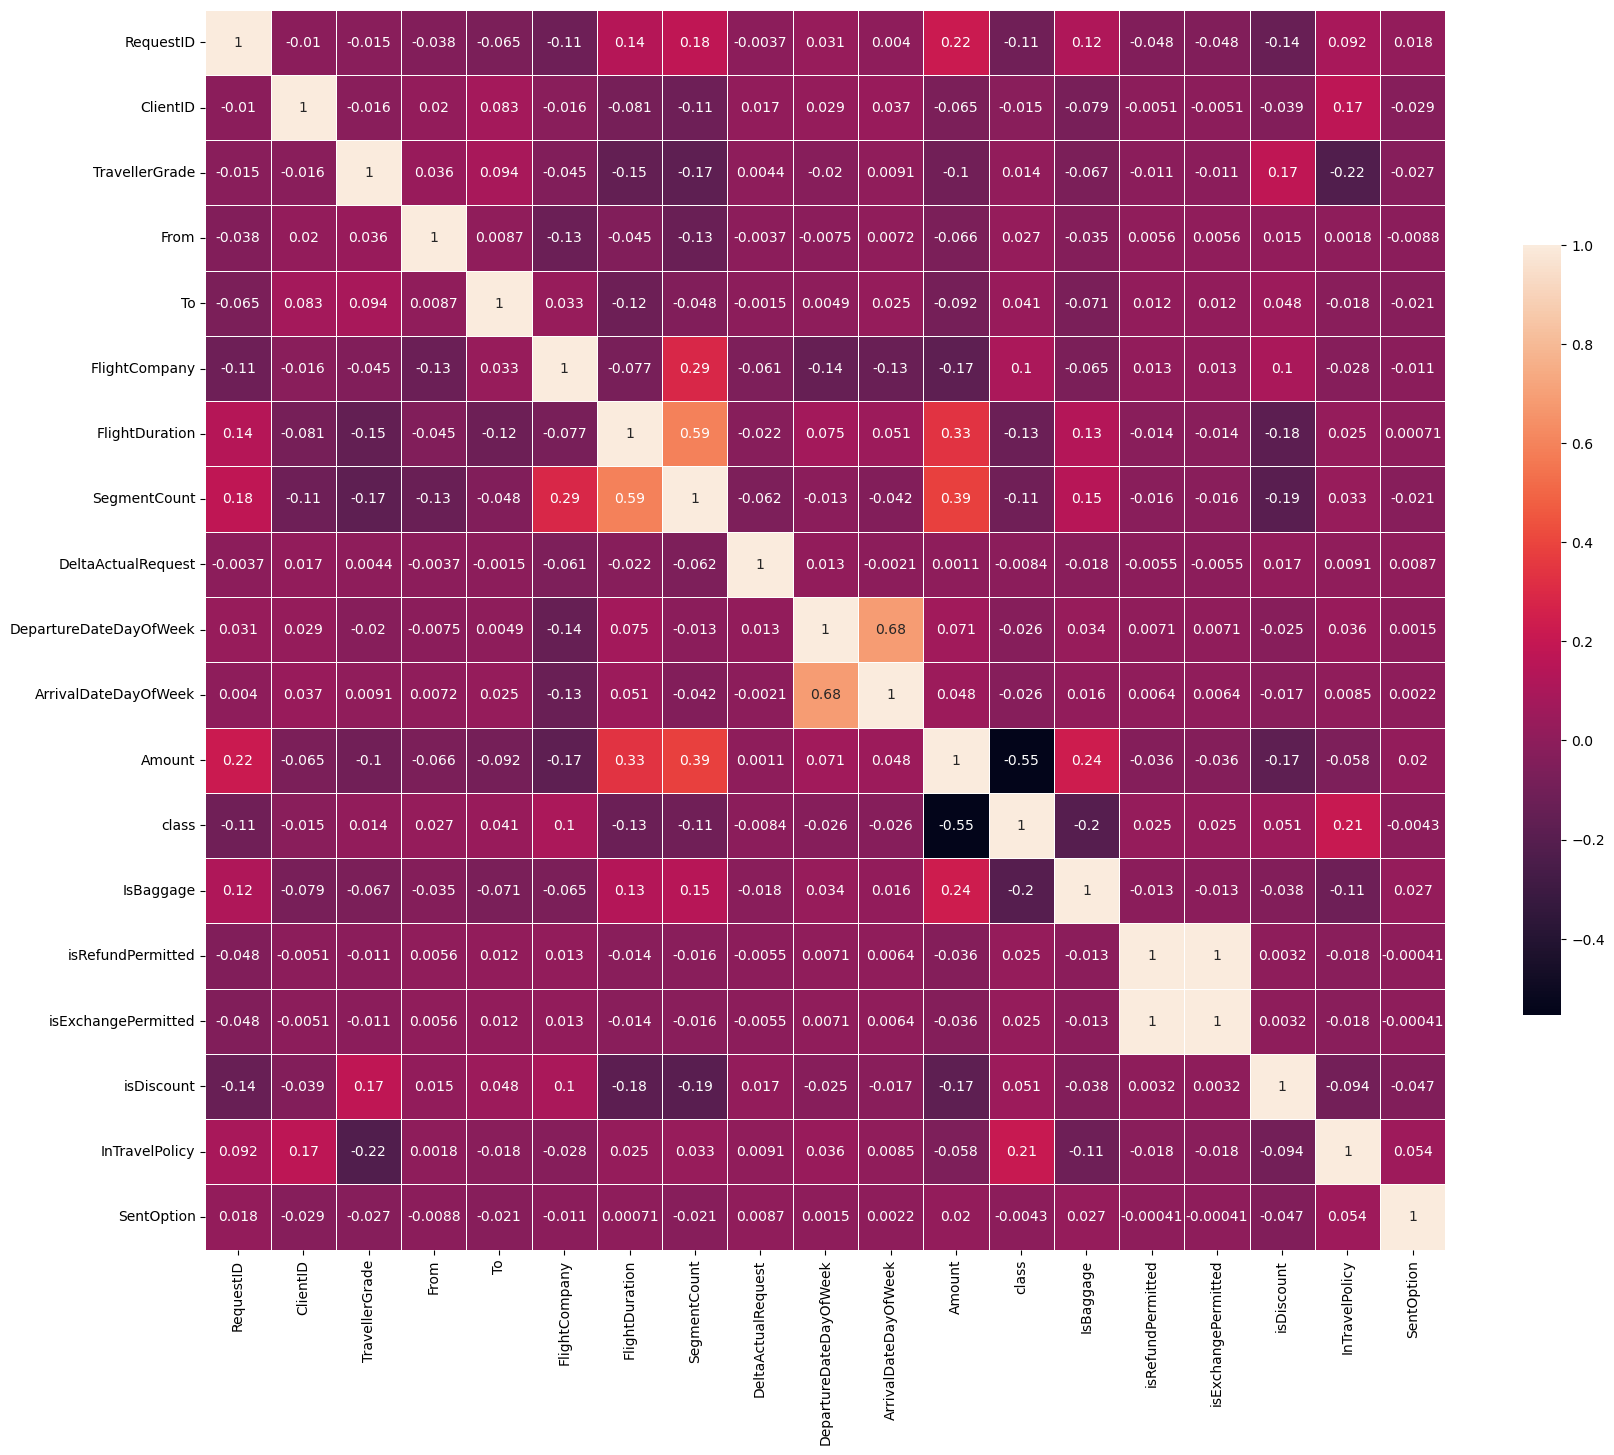

In [28]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    simple_x.merge(simple_y, left_index=True, right_index=True).corr(),
#     vmax=.3,
    square=True,
    linewidths=.5,
    annot=True,
    cbar_kws={"shrink": .5},
    ax=ax
)

<a name="6."></a>
# Построение модели

<font size="2">([к содержанию](#0.0))</font>

<a name="6.1."></a>
# Деление данных

<font size="2">([к содержанию](#0.0))</font>

In [29]:
def simple_split_df(x, y, need_test=True):
    df = pd.merge(x, y, left_index=True, right_index=True).dropna()
    positive_df = df.query('SentOption == 1')
    size = positive_df.shape[0]
    negative_df = df.query('SentOption == 0').sample(size)
    
    train_test_df = pd.concat([positive_df, negative_df])
    
    for column in [
        'TravellerGrade',
        'FlightCompany',
        'FlightDuration',
        'DepartureDateDayOfWeek',
        'ArrivalDateDayOfWeek',
        'class',
        'IsBaggage',
        'isRefundPermitted',
        'isExchangePermitted',
        'isDiscount',
        'InTravelPolicy'
    ]:
        train_test_df[column] = train_test_df[column].astype('int')
    
    x = train_test_df.drop(['SentOption', 'RequestID'], axis=1)
    y = train_test_df['SentOption']
    
    if need_test:
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=True)
        return x_train, x_test, y_train, y_test
    else:
        return x, y

In [30]:
def split_df(x, y):
    df = pd.merge(x, y, left_index=True, right_index=True)
    positive_rows = []
    negative_rows = []
    for request in df.RequestID.unique():
        local_df = df.query('RequestID == @request')
        local_positive_df = local_df.query('SentOption == 1')
        positive_rows += local_positive_df.values.tolist()
        local_negative_df = local_df.query('SentOption == 0')
        size = min(local_positive_df.shape[0], local_negative_df.shape[0])
        if size > 0:
            local_negative_df = local_negative_df.sample(size)
            negative_rows += local_negative_df.values.tolist()
        else:
            print(f'У запроса {request} нет пустых вариантов')
    downsampling_df = pd.DataFrame(
        positive_rows + negative_rows,
        columns = df.columns
    )
    
    return downsampling_df

In [31]:
x_train, x_test, y_train, y_test = simple_split_df(simple_x, simple_y)
x_all, y_all = simple_split_df(simple_x, simple_y, False)

<a name="6.2."></a>
# Градиентный бустинг

<font size="2">([к содержанию](#0.0))</font>

In [32]:
# Градиентный бустинг
catboost_train_pool = Pool(x_train, y_train, cat_features=simple_cats)
catboost_test_pool = Pool(x_test, y_test, cat_features=simple_cats)
catboost_all_pool = Pool(x_all, y_all, cat_features=simple_cats)

In [33]:
model = CatBoostClassifier(
    num_trees=1000,
    loss_function='Logloss',
    verbose=True)

In [34]:
model.fit(catboost_train_pool, use_best_model=True,
    eval_set=catboost_test_pool)

Learning rate set to 0.087069
0:	learn: 0.6594739	test: 0.6585040	best: 0.6585040 (0)	total: 235ms	remaining: 3m 55s
1:	learn: 0.6287967	test: 0.6276358	best: 0.6276358 (1)	total: 297ms	remaining: 2m 28s
2:	learn: 0.6018909	test: 0.6007235	best: 0.6007235 (2)	total: 354ms	remaining: 1m 57s
3:	learn: 0.5799091	test: 0.5787713	best: 0.5787713 (3)	total: 416ms	remaining: 1m 43s
4:	learn: 0.5611441	test: 0.5600095	best: 0.5600095 (4)	total: 470ms	remaining: 1m 33s
5:	learn: 0.5454769	test: 0.5442775	best: 0.5442775 (5)	total: 524ms	remaining: 1m 26s
6:	learn: 0.5299367	test: 0.5286634	best: 0.5286634 (6)	total: 586ms	remaining: 1m 23s
7:	learn: 0.5171845	test: 0.5154777	best: 0.5154777 (7)	total: 643ms	remaining: 1m 19s
8:	learn: 0.5062795	test: 0.5043051	best: 0.5043051 (8)	total: 691ms	remaining: 1m 16s
9:	learn: 0.4978839	test: 0.4957190	best: 0.4957190 (9)	total: 739ms	remaining: 1m 13s
10:	learn: 0.4897398	test: 0.4873354	best: 0.4873354 (10)	total: 780ms	remaining: 1m 10s
11:	learn: 

95:	learn: 0.3775202	test: 0.3756980	best: 0.3756980 (95)	total: 7.34s	remaining: 1m 9s
96:	learn: 0.3771262	test: 0.3754562	best: 0.3754562 (96)	total: 7.41s	remaining: 1m 9s
97:	learn: 0.3769438	test: 0.3753156	best: 0.3753156 (97)	total: 7.48s	remaining: 1m 8s
98:	learn: 0.3765979	test: 0.3750969	best: 0.3750969 (98)	total: 7.55s	remaining: 1m 8s
99:	learn: 0.3760751	test: 0.3746665	best: 0.3746665 (99)	total: 7.62s	remaining: 1m 8s
100:	learn: 0.3759024	test: 0.3745854	best: 0.3745854 (100)	total: 7.7s	remaining: 1m 8s
101:	learn: 0.3754934	test: 0.3742663	best: 0.3742663 (101)	total: 7.77s	remaining: 1m 8s
102:	learn: 0.3751587	test: 0.3739194	best: 0.3739194 (102)	total: 7.84s	remaining: 1m 8s
103:	learn: 0.3750913	test: 0.3739027	best: 0.3739027 (103)	total: 7.89s	remaining: 1m 8s
104:	learn: 0.3749121	test: 0.3737862	best: 0.3737862 (104)	total: 7.96s	remaining: 1m 7s
105:	learn: 0.3745099	test: 0.3734662	best: 0.3734662 (105)	total: 8.02s	remaining: 1m 7s
106:	learn: 0.3740368

190:	learn: 0.3547530	test: 0.3590123	best: 0.3590123 (190)	total: 13.6s	remaining: 57.8s
191:	learn: 0.3545400	test: 0.3588671	best: 0.3588671 (191)	total: 13.7s	remaining: 57.7s
192:	learn: 0.3544100	test: 0.3587490	best: 0.3587490 (192)	total: 13.8s	remaining: 57.6s
193:	learn: 0.3542513	test: 0.3586431	best: 0.3586431 (193)	total: 13.8s	remaining: 57.5s
194:	learn: 0.3540968	test: 0.3585753	best: 0.3585753 (194)	total: 13.9s	remaining: 57.4s
195:	learn: 0.3538470	test: 0.3584434	best: 0.3584434 (195)	total: 14s	remaining: 57.3s
196:	learn: 0.3537573	test: 0.3583801	best: 0.3583801 (196)	total: 14s	remaining: 57.2s
197:	learn: 0.3535105	test: 0.3581320	best: 0.3581320 (197)	total: 14.1s	remaining: 57.1s
198:	learn: 0.3532482	test: 0.3578704	best: 0.3578704 (198)	total: 14.2s	remaining: 57s
199:	learn: 0.3531087	test: 0.3577622	best: 0.3577622 (199)	total: 14.2s	remaining: 56.9s
200:	learn: 0.3529331	test: 0.3576234	best: 0.3576234 (200)	total: 14.3s	remaining: 56.8s
201:	learn: 0.35

284:	learn: 0.3426240	test: 0.3510955	best: 0.3510955 (284)	total: 20.1s	remaining: 50.5s
285:	learn: 0.3424897	test: 0.3510824	best: 0.3510824 (285)	total: 20.2s	remaining: 50.5s
286:	learn: 0.3424160	test: 0.3510386	best: 0.3510386 (286)	total: 20.3s	remaining: 50.4s
287:	learn: 0.3423673	test: 0.3510257	best: 0.3510257 (287)	total: 20.4s	remaining: 50.4s
288:	learn: 0.3422669	test: 0.3509808	best: 0.3509808 (288)	total: 20.5s	remaining: 50.3s
289:	learn: 0.3421842	test: 0.3508992	best: 0.3508992 (289)	total: 20.5s	remaining: 50.3s
290:	learn: 0.3421486	test: 0.3508599	best: 0.3508599 (290)	total: 20.6s	remaining: 50.2s
291:	learn: 0.3420912	test: 0.3508198	best: 0.3508198 (291)	total: 20.7s	remaining: 50.1s
292:	learn: 0.3419396	test: 0.3506920	best: 0.3506920 (292)	total: 20.7s	remaining: 50s
293:	learn: 0.3417967	test: 0.3505884	best: 0.3505884 (293)	total: 20.8s	remaining: 49.9s
294:	learn: 0.3416749	test: 0.3505338	best: 0.3505338 (294)	total: 20.9s	remaining: 49.9s
295:	learn: 

378:	learn: 0.3347013	test: 0.3468413	best: 0.3468413 (378)	total: 26.3s	remaining: 43.1s
379:	learn: 0.3346185	test: 0.3468108	best: 0.3468108 (379)	total: 26.3s	remaining: 43s
380:	learn: 0.3345496	test: 0.3468218	best: 0.3468108 (379)	total: 26.4s	remaining: 42.9s
381:	learn: 0.3344367	test: 0.3466556	best: 0.3466556 (381)	total: 26.5s	remaining: 42.8s
382:	learn: 0.3344246	test: 0.3466519	best: 0.3466519 (382)	total: 26.5s	remaining: 42.8s
383:	learn: 0.3343732	test: 0.3466259	best: 0.3466259 (383)	total: 26.6s	remaining: 42.7s
384:	learn: 0.3342861	test: 0.3464844	best: 0.3464844 (384)	total: 26.7s	remaining: 42.6s
385:	learn: 0.3342209	test: 0.3464914	best: 0.3464844 (384)	total: 26.7s	remaining: 42.5s
386:	learn: 0.3340874	test: 0.3463993	best: 0.3463993 (386)	total: 26.8s	remaining: 42.4s
387:	learn: 0.3340268	test: 0.3463422	best: 0.3463422 (387)	total: 26.8s	remaining: 42.3s
388:	learn: 0.3339789	test: 0.3463199	best: 0.3463199 (388)	total: 26.9s	remaining: 42.3s
389:	learn: 

473:	learn: 0.3284203	test: 0.3438159	best: 0.3438159 (473)	total: 32.4s	remaining: 36s
474:	learn: 0.3283450	test: 0.3437966	best: 0.3437966 (474)	total: 32.5s	remaining: 35.9s
475:	learn: 0.3283071	test: 0.3437856	best: 0.3437856 (475)	total: 32.6s	remaining: 35.8s
476:	learn: 0.3282831	test: 0.3437825	best: 0.3437825 (476)	total: 32.6s	remaining: 35.8s
477:	learn: 0.3282161	test: 0.3437582	best: 0.3437582 (477)	total: 32.7s	remaining: 35.7s
478:	learn: 0.3281238	test: 0.3437487	best: 0.3437487 (478)	total: 32.8s	remaining: 35.6s
479:	learn: 0.3280987	test: 0.3437473	best: 0.3437473 (479)	total: 32.8s	remaining: 35.6s
480:	learn: 0.3280091	test: 0.3437129	best: 0.3437129 (480)	total: 32.9s	remaining: 35.5s
481:	learn: 0.3279587	test: 0.3436953	best: 0.3436953 (481)	total: 33s	remaining: 35.4s
482:	learn: 0.3279124	test: 0.3436844	best: 0.3436844 (482)	total: 33s	remaining: 35.3s
483:	learn: 0.3278804	test: 0.3436677	best: 0.3436677 (483)	total: 33.1s	remaining: 35.3s
484:	learn: 0.32

565:	learn: 0.3226881	test: 0.3418550	best: 0.3418550 (565)	total: 39.1s	remaining: 30s
566:	learn: 0.3226575	test: 0.3418302	best: 0.3418302 (566)	total: 39.2s	remaining: 29.9s
567:	learn: 0.3226137	test: 0.3418016	best: 0.3418016 (567)	total: 39.2s	remaining: 29.8s
568:	learn: 0.3225540	test: 0.3417642	best: 0.3417642 (568)	total: 39.3s	remaining: 29.8s
569:	learn: 0.3225301	test: 0.3417465	best: 0.3417465 (569)	total: 39.4s	remaining: 29.7s
570:	learn: 0.3224655	test: 0.3417556	best: 0.3417465 (569)	total: 39.4s	remaining: 29.6s
571:	learn: 0.3224119	test: 0.3417338	best: 0.3417338 (571)	total: 39.5s	remaining: 29.5s
572:	learn: 0.3223474	test: 0.3417007	best: 0.3417007 (572)	total: 39.5s	remaining: 29.5s
573:	learn: 0.3223057	test: 0.3416774	best: 0.3416774 (573)	total: 39.6s	remaining: 29.4s
574:	learn: 0.3222393	test: 0.3416437	best: 0.3416437 (574)	total: 39.7s	remaining: 29.3s
575:	learn: 0.3221889	test: 0.3416487	best: 0.3416437 (574)	total: 39.7s	remaining: 29.2s
576:	learn: 

657:	learn: 0.3175185	test: 0.3401165	best: 0.3401165 (657)	total: 45.1s	remaining: 23.5s
658:	learn: 0.3174351	test: 0.3400868	best: 0.3400868 (658)	total: 45.2s	remaining: 23.4s
659:	learn: 0.3173660	test: 0.3400925	best: 0.3400868 (658)	total: 45.3s	remaining: 23.3s
660:	learn: 0.3173406	test: 0.3400965	best: 0.3400868 (658)	total: 45.3s	remaining: 23.2s
661:	learn: 0.3173163	test: 0.3400890	best: 0.3400868 (658)	total: 45.4s	remaining: 23.2s
662:	learn: 0.3172185	test: 0.3400766	best: 0.3400766 (662)	total: 45.5s	remaining: 23.1s
663:	learn: 0.3172049	test: 0.3400818	best: 0.3400766 (662)	total: 45.5s	remaining: 23s
664:	learn: 0.3170960	test: 0.3400754	best: 0.3400754 (664)	total: 45.6s	remaining: 23s
665:	learn: 0.3169687	test: 0.3400613	best: 0.3400613 (665)	total: 45.6s	remaining: 22.9s
666:	learn: 0.3169184	test: 0.3400480	best: 0.3400480 (666)	total: 45.7s	remaining: 22.8s
667:	learn: 0.3168630	test: 0.3400291	best: 0.3400291 (667)	total: 45.8s	remaining: 22.8s
668:	learn: 0.

751:	learn: 0.3123447	test: 0.3386540	best: 0.3386464 (750)	total: 51.7s	remaining: 17.1s
752:	learn: 0.3123164	test: 0.3386488	best: 0.3386464 (750)	total: 51.8s	remaining: 17s
753:	learn: 0.3122472	test: 0.3386485	best: 0.3386464 (750)	total: 51.9s	remaining: 16.9s
754:	learn: 0.3122409	test: 0.3386512	best: 0.3386464 (750)	total: 51.9s	remaining: 16.9s
755:	learn: 0.3122195	test: 0.3386504	best: 0.3386464 (750)	total: 52s	remaining: 16.8s
756:	learn: 0.3121850	test: 0.3386625	best: 0.3386464 (750)	total: 52.1s	remaining: 16.7s
757:	learn: 0.3121155	test: 0.3386554	best: 0.3386464 (750)	total: 52.2s	remaining: 16.7s
758:	learn: 0.3120744	test: 0.3385960	best: 0.3385960 (758)	total: 52.3s	remaining: 16.6s
759:	learn: 0.3120447	test: 0.3385883	best: 0.3385883 (759)	total: 52.4s	remaining: 16.5s
760:	learn: 0.3120086	test: 0.3385541	best: 0.3385541 (760)	total: 52.4s	remaining: 16.5s
761:	learn: 0.3119399	test: 0.3385193	best: 0.3385193 (761)	total: 52.5s	remaining: 16.4s
762:	learn: 0.

845:	learn: 0.3078257	test: 0.3375238	best: 0.3375238 (845)	total: 58.2s	remaining: 10.6s
846:	learn: 0.3077897	test: 0.3375304	best: 0.3375238 (845)	total: 58.2s	remaining: 10.5s
847:	learn: 0.3077800	test: 0.3375306	best: 0.3375238 (845)	total: 58.3s	remaining: 10.4s
848:	learn: 0.3077769	test: 0.3375366	best: 0.3375238 (845)	total: 58.4s	remaining: 10.4s
849:	learn: 0.3077288	test: 0.3375325	best: 0.3375238 (845)	total: 58.4s	remaining: 10.3s
850:	learn: 0.3076920	test: 0.3375002	best: 0.3375002 (850)	total: 58.5s	remaining: 10.2s
851:	learn: 0.3076687	test: 0.3374986	best: 0.3374986 (851)	total: 58.5s	remaining: 10.2s
852:	learn: 0.3076387	test: 0.3375016	best: 0.3374986 (851)	total: 58.6s	remaining: 10.1s
853:	learn: 0.3075959	test: 0.3374887	best: 0.3374887 (853)	total: 58.7s	remaining: 10s
854:	learn: 0.3075148	test: 0.3374709	best: 0.3374709 (854)	total: 58.8s	remaining: 9.96s
855:	learn: 0.3074616	test: 0.3374835	best: 0.3374709 (854)	total: 58.8s	remaining: 9.9s
856:	learn: 0

940:	learn: 0.3042656	test: 0.3367568	best: 0.3367505 (939)	total: 1m 4s	remaining: 4.04s
941:	learn: 0.3042384	test: 0.3367497	best: 0.3367497 (941)	total: 1m 4s	remaining: 3.97s
942:	learn: 0.3041871	test: 0.3367401	best: 0.3367401 (942)	total: 1m 4s	remaining: 3.9s
943:	learn: 0.3041605	test: 0.3367361	best: 0.3367361 (943)	total: 1m 4s	remaining: 3.83s
944:	learn: 0.3041348	test: 0.3367004	best: 0.3367004 (944)	total: 1m 4s	remaining: 3.77s
945:	learn: 0.3041172	test: 0.3367179	best: 0.3367004 (944)	total: 1m 4s	remaining: 3.7s
946:	learn: 0.3040909	test: 0.3367336	best: 0.3367004 (944)	total: 1m 4s	remaining: 3.63s
947:	learn: 0.3040620	test: 0.3367250	best: 0.3367004 (944)	total: 1m 4s	remaining: 3.56s
948:	learn: 0.3040256	test: 0.3367185	best: 0.3367004 (944)	total: 1m 4s	remaining: 3.49s
949:	learn: 0.3040041	test: 0.3367354	best: 0.3367004 (944)	total: 1m 5s	remaining: 3.42s
950:	learn: 0.3039952	test: 0.3367353	best: 0.3367004 (944)	total: 1m 5s	remaining: 3.35s
951:	learn: 

In [35]:
def get_scores(model, x_train, y_train, x_test, y_test):
    print(f1_score(model.predict(x_train), y_train))
    print(f1_score(model.predict(x_test), y_test))
    print(accuracy_score(model.predict(x_train), y_train))
    print(accuracy_score(model.predict(x_test), y_test))

In [36]:
get_scores(model, x_train, y_train, x_test, y_test)

0.8871121518775612
0.8574842349817459
0.8872535917139993
0.8565414940531872


In [37]:
full_model = CatBoostClassifier(
    num_trees=1000,
    loss_function='Logloss',
    verbose=True)

In [38]:
full_model.fit(catboost_all_pool, use_best_model=True,
    eval_set=catboost_test_pool)

Learning rate set to 0.092003
0:	learn: 0.6605353	test: 0.6605165	best: 0.6605165 (0)	total: 77.6ms	remaining: 1m 17s
1:	learn: 0.6269073	test: 0.6267065	best: 0.6267065 (1)	total: 151ms	remaining: 1m 15s
2:	learn: 0.6003252	test: 0.5996797	best: 0.5996797 (2)	total: 218ms	remaining: 1m 12s
3:	learn: 0.5763450	test: 0.5751464	best: 0.5751464 (3)	total: 276ms	remaining: 1m 8s
4:	learn: 0.5567162	test: 0.5550965	best: 0.5550965 (4)	total: 349ms	remaining: 1m 9s
5:	learn: 0.5410864	test: 0.5390572	best: 0.5390572 (5)	total: 417ms	remaining: 1m 9s
6:	learn: 0.5272696	test: 0.5249473	best: 0.5249473 (6)	total: 467ms	remaining: 1m 6s
7:	learn: 0.5143687	test: 0.5116660	best: 0.5116660 (7)	total: 536ms	remaining: 1m 6s
8:	learn: 0.5038579	test: 0.5006894	best: 0.5006894 (8)	total: 610ms	remaining: 1m 7s
9:	learn: 0.4960052	test: 0.4924140	best: 0.4924140 (9)	total: 660ms	remaining: 1m 5s
10:	learn: 0.4895400	test: 0.4857798	best: 0.4857798 (10)	total: 724ms	remaining: 1m 5s
11:	learn: 0.48330

94:	learn: 0.3758147	test: 0.3549745	best: 0.3549745 (94)	total: 7.18s	remaining: 1m 8s
95:	learn: 0.3753410	test: 0.3544446	best: 0.3544446 (95)	total: 7.26s	remaining: 1m 8s
96:	learn: 0.3750111	test: 0.3541572	best: 0.3541572 (96)	total: 7.34s	remaining: 1m 8s
97:	learn: 0.3747479	test: 0.3537847	best: 0.3537847 (97)	total: 7.43s	remaining: 1m 8s
98:	learn: 0.3745023	test: 0.3535820	best: 0.3535820 (98)	total: 7.49s	remaining: 1m 8s
99:	learn: 0.3741282	test: 0.3530366	best: 0.3530366 (99)	total: 7.57s	remaining: 1m 8s
100:	learn: 0.3738407	test: 0.3527722	best: 0.3527722 (100)	total: 7.65s	remaining: 1m 8s
101:	learn: 0.3735161	test: 0.3524443	best: 0.3524443 (101)	total: 7.74s	remaining: 1m 8s
102:	learn: 0.3731247	test: 0.3519260	best: 0.3519260 (102)	total: 7.82s	remaining: 1m 8s
103:	learn: 0.3727706	test: 0.3514155	best: 0.3514155 (103)	total: 7.92s	remaining: 1m 8s
104:	learn: 0.3725630	test: 0.3512781	best: 0.3512781 (104)	total: 8s	remaining: 1m 8s
105:	learn: 0.3721059	tes

188:	learn: 0.3546763	test: 0.3349528	best: 0.3349528 (188)	total: 15.1s	remaining: 1m 4s
189:	learn: 0.3545184	test: 0.3348115	best: 0.3348115 (189)	total: 15.2s	remaining: 1m 4s
190:	learn: 0.3544759	test: 0.3347795	best: 0.3347795 (190)	total: 15.2s	remaining: 1m 4s
191:	learn: 0.3542479	test: 0.3345332	best: 0.3345332 (191)	total: 15.3s	remaining: 1m 4s
192:	learn: 0.3541341	test: 0.3344256	best: 0.3344256 (192)	total: 15.4s	remaining: 1m 4s
193:	learn: 0.3539345	test: 0.3342934	best: 0.3342934 (193)	total: 15.5s	remaining: 1m 4s
194:	learn: 0.3537500	test: 0.3341431	best: 0.3341431 (194)	total: 15.5s	remaining: 1m 4s
195:	learn: 0.3535840	test: 0.3340227	best: 0.3340227 (195)	total: 15.6s	remaining: 1m 4s
196:	learn: 0.3535359	test: 0.3340000	best: 0.3340000 (196)	total: 15.7s	remaining: 1m 3s
197:	learn: 0.3533850	test: 0.3337900	best: 0.3337900 (197)	total: 15.8s	remaining: 1m 3s
198:	learn: 0.3533578	test: 0.3337838	best: 0.3337838 (198)	total: 15.9s	remaining: 1m 3s
199:	learn

280:	learn: 0.3427628	test: 0.3253130	best: 0.3253130 (280)	total: 22.2s	remaining: 56.9s
281:	learn: 0.3427023	test: 0.3252631	best: 0.3252631 (281)	total: 22.3s	remaining: 56.8s
282:	learn: 0.3426493	test: 0.3252249	best: 0.3252249 (282)	total: 22.4s	remaining: 56.7s
283:	learn: 0.3426069	test: 0.3252046	best: 0.3252046 (283)	total: 22.4s	remaining: 56.6s
284:	learn: 0.3423913	test: 0.3250159	best: 0.3250159 (284)	total: 22.5s	remaining: 56.5s
285:	learn: 0.3422386	test: 0.3248326	best: 0.3248326 (285)	total: 22.6s	remaining: 56.5s
286:	learn: 0.3421791	test: 0.3248297	best: 0.3248297 (286)	total: 22.7s	remaining: 56.4s
287:	learn: 0.3420886	test: 0.3248137	best: 0.3248137 (287)	total: 22.8s	remaining: 56.3s
288:	learn: 0.3419639	test: 0.3247300	best: 0.3247300 (288)	total: 22.8s	remaining: 56.2s
289:	learn: 0.3418136	test: 0.3244608	best: 0.3244608 (289)	total: 22.9s	remaining: 56.1s
290:	learn: 0.3416704	test: 0.3243866	best: 0.3243866 (290)	total: 23s	remaining: 56s
291:	learn: 0.

372:	learn: 0.3344286	test: 0.3193914	best: 0.3193914 (372)	total: 30.1s	remaining: 50.6s
373:	learn: 0.3343842	test: 0.3193425	best: 0.3193425 (373)	total: 30.2s	remaining: 50.5s
374:	learn: 0.3343543	test: 0.3193198	best: 0.3193198 (374)	total: 30.3s	remaining: 50.5s
375:	learn: 0.3342696	test: 0.3192426	best: 0.3192426 (375)	total: 30.4s	remaining: 50.4s
376:	learn: 0.3341227	test: 0.3191019	best: 0.3191019 (376)	total: 30.5s	remaining: 50.4s
377:	learn: 0.3341115	test: 0.3191034	best: 0.3191019 (376)	total: 30.6s	remaining: 50.3s
378:	learn: 0.3340221	test: 0.3190749	best: 0.3190749 (378)	total: 30.6s	remaining: 50.2s
379:	learn: 0.3339280	test: 0.3189929	best: 0.3189929 (379)	total: 30.7s	remaining: 50.1s
380:	learn: 0.3338689	test: 0.3189750	best: 0.3189750 (380)	total: 30.8s	remaining: 50s
381:	learn: 0.3338129	test: 0.3189117	best: 0.3189117 (381)	total: 30.9s	remaining: 49.9s
382:	learn: 0.3337773	test: 0.3188989	best: 0.3188989 (382)	total: 31s	remaining: 49.9s
383:	learn: 0.

466:	learn: 0.3277979	test: 0.3152165	best: 0.3152165 (466)	total: 37.7s	remaining: 43.1s
467:	learn: 0.3277054	test: 0.3151888	best: 0.3151888 (467)	total: 37.8s	remaining: 43s
468:	learn: 0.3276519	test: 0.3151597	best: 0.3151597 (468)	total: 37.9s	remaining: 42.9s
469:	learn: 0.3276320	test: 0.3151509	best: 0.3151509 (469)	total: 38s	remaining: 42.8s
470:	learn: 0.3275872	test: 0.3151567	best: 0.3151509 (469)	total: 38.1s	remaining: 42.8s
471:	learn: 0.3275372	test: 0.3151339	best: 0.3151339 (471)	total: 38.2s	remaining: 42.7s
472:	learn: 0.3274633	test: 0.3151407	best: 0.3151339 (471)	total: 38.2s	remaining: 42.6s
473:	learn: 0.3274166	test: 0.3151081	best: 0.3151081 (473)	total: 38.3s	remaining: 42.5s
474:	learn: 0.3273674	test: 0.3150374	best: 0.3150374 (474)	total: 38.4s	remaining: 42.4s
475:	learn: 0.3273045	test: 0.3150305	best: 0.3150305 (475)	total: 38.5s	remaining: 42.4s
476:	learn: 0.3272391	test: 0.3150188	best: 0.3150188 (476)	total: 38.5s	remaining: 42.3s
477:	learn: 0.

559:	learn: 0.3223076	test: 0.3126474	best: 0.3126366 (558)	total: 45.6s	remaining: 35.8s
560:	learn: 0.3222516	test: 0.3126436	best: 0.3126366 (558)	total: 45.7s	remaining: 35.7s
561:	learn: 0.3222216	test: 0.3126274	best: 0.3126274 (561)	total: 45.8s	remaining: 35.7s
562:	learn: 0.3221836	test: 0.3125795	best: 0.3125795 (562)	total: 45.9s	remaining: 35.6s
563:	learn: 0.3221071	test: 0.3125140	best: 0.3125140 (563)	total: 46s	remaining: 35.5s
564:	learn: 0.3220705	test: 0.3124941	best: 0.3124941 (564)	total: 46.1s	remaining: 35.5s
565:	learn: 0.3220602	test: 0.3124964	best: 0.3124941 (564)	total: 46.1s	remaining: 35.4s
566:	learn: 0.3219164	test: 0.3123978	best: 0.3123978 (566)	total: 46.2s	remaining: 35.3s
567:	learn: 0.3218619	test: 0.3123624	best: 0.3123624 (567)	total: 46.3s	remaining: 35.2s
568:	learn: 0.3218348	test: 0.3123470	best: 0.3123470 (568)	total: 46.4s	remaining: 35.2s
569:	learn: 0.3218105	test: 0.3123645	best: 0.3123470 (568)	total: 46.5s	remaining: 35.1s
570:	learn: 

652:	learn: 0.3175796	test: 0.3106077	best: 0.3106077 (652)	total: 53.1s	remaining: 28.2s
653:	learn: 0.3175124	test: 0.3105803	best: 0.3105803 (653)	total: 53.2s	remaining: 28.2s
654:	learn: 0.3174765	test: 0.3105393	best: 0.3105393 (654)	total: 53.3s	remaining: 28.1s
655:	learn: 0.3174674	test: 0.3105449	best: 0.3105393 (654)	total: 53.4s	remaining: 28s
656:	learn: 0.3173928	test: 0.3104731	best: 0.3104731 (656)	total: 53.5s	remaining: 27.9s
657:	learn: 0.3173580	test: 0.3104537	best: 0.3104537 (657)	total: 53.5s	remaining: 27.8s
658:	learn: 0.3173224	test: 0.3104601	best: 0.3104537 (657)	total: 53.6s	remaining: 27.7s
659:	learn: 0.3172867	test: 0.3104502	best: 0.3104502 (659)	total: 53.7s	remaining: 27.7s
660:	learn: 0.3172617	test: 0.3104081	best: 0.3104081 (660)	total: 53.8s	remaining: 27.6s
661:	learn: 0.3172259	test: 0.3103882	best: 0.3103882 (661)	total: 53.8s	remaining: 27.5s
662:	learn: 0.3171833	test: 0.3104048	best: 0.3103882 (661)	total: 53.9s	remaining: 27.4s
663:	learn: 

745:	learn: 0.3133035	test: 0.3087258	best: 0.3087258 (745)	total: 1m	remaining: 20.8s
746:	learn: 0.3132680	test: 0.3087176	best: 0.3087176 (746)	total: 1m 1s	remaining: 20.7s
747:	learn: 0.3131726	test: 0.3086293	best: 0.3086293 (747)	total: 1m 1s	remaining: 20.6s
748:	learn: 0.3131111	test: 0.3086188	best: 0.3086188 (748)	total: 1m 1s	remaining: 20.5s
749:	learn: 0.3130930	test: 0.3086057	best: 0.3086057 (749)	total: 1m 1s	remaining: 20.5s
750:	learn: 0.3130378	test: 0.3085975	best: 0.3085975 (750)	total: 1m 1s	remaining: 20.4s
751:	learn: 0.3130151	test: 0.3086011	best: 0.3085975 (750)	total: 1m 1s	remaining: 20.3s
752:	learn: 0.3129733	test: 0.3086070	best: 0.3085975 (750)	total: 1m 1s	remaining: 20.2s
753:	learn: 0.3129255	test: 0.3085548	best: 0.3085548 (753)	total: 1m 1s	remaining: 20.1s
754:	learn: 0.3128829	test: 0.3085218	best: 0.3085218 (754)	total: 1m 1s	remaining: 20.1s
755:	learn: 0.3128183	test: 0.3085285	best: 0.3085218 (754)	total: 1m 1s	remaining: 20s
756:	learn: 0.3

839:	learn: 0.3093037	test: 0.3068602	best: 0.3068602 (839)	total: 1m 8s	remaining: 13.1s
840:	learn: 0.3092305	test: 0.3068399	best: 0.3068399 (840)	total: 1m 8s	remaining: 13s
841:	learn: 0.3091958	test: 0.3068377	best: 0.3068377 (841)	total: 1m 8s	remaining: 12.9s
842:	learn: 0.3091753	test: 0.3068455	best: 0.3068377 (841)	total: 1m 9s	remaining: 12.9s
843:	learn: 0.3091311	test: 0.3068419	best: 0.3068377 (841)	total: 1m 9s	remaining: 12.8s
844:	learn: 0.3091085	test: 0.3068264	best: 0.3068264 (844)	total: 1m 9s	remaining: 12.7s
845:	learn: 0.3090923	test: 0.3068169	best: 0.3068169 (845)	total: 1m 9s	remaining: 12.6s
846:	learn: 0.3090601	test: 0.3068310	best: 0.3068169 (845)	total: 1m 9s	remaining: 12.5s
847:	learn: 0.3090320	test: 0.3068353	best: 0.3068169 (845)	total: 1m 9s	remaining: 12.4s
848:	learn: 0.3089942	test: 0.3068326	best: 0.3068169 (845)	total: 1m 9s	remaining: 12.4s
849:	learn: 0.3089249	test: 0.3068256	best: 0.3068169 (845)	total: 1m 9s	remaining: 12.3s
850:	learn: 

932:	learn: 0.3056791	test: 0.3056510	best: 0.3056510 (932)	total: 1m 16s	remaining: 5.49s
933:	learn: 0.3056590	test: 0.3056555	best: 0.3056510 (932)	total: 1m 16s	remaining: 5.4s
934:	learn: 0.3056326	test: 0.3056484	best: 0.3056484 (934)	total: 1m 16s	remaining: 5.32s
935:	learn: 0.3055687	test: 0.3056297	best: 0.3056297 (935)	total: 1m 16s	remaining: 5.24s
936:	learn: 0.3055300	test: 0.3056022	best: 0.3056022 (936)	total: 1m 16s	remaining: 5.16s
937:	learn: 0.3055167	test: 0.3055989	best: 0.3055989 (937)	total: 1m 16s	remaining: 5.08s
938:	learn: 0.3055018	test: 0.3055811	best: 0.3055811 (938)	total: 1m 17s	remaining: 5s
939:	learn: 0.3054785	test: 0.3055625	best: 0.3055625 (939)	total: 1m 17s	remaining: 4.92s
940:	learn: 0.3054488	test: 0.3055486	best: 0.3055486 (940)	total: 1m 17s	remaining: 4.84s
941:	learn: 0.3054282	test: 0.3055379	best: 0.3055379 (941)	total: 1m 17s	remaining: 4.76s
942:	learn: 0.3053761	test: 0.3055000	best: 0.3055000 (942)	total: 1m 17s	remaining: 4.68s
943

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

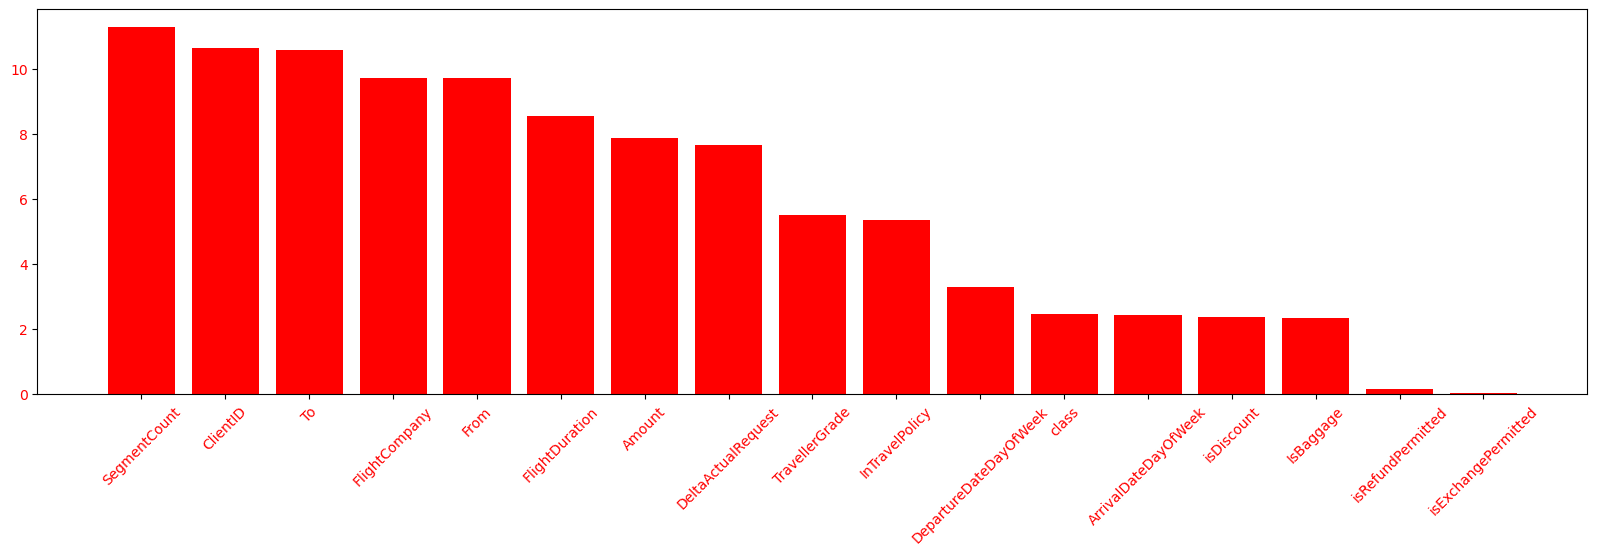

In [39]:
importance = pd.DataFrame(model.get_feature_importance(), index=x_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(20, 5))
plt.bar(importance.index, importance[0], color='red')
plt.xticks(rotation=45, color='red')
plt.yticks(color='red')

In [40]:
full_model.save_model('gb_model')

<a name="6.3."></a>
# Случайный лес

<font size="2">([к содержанию](#0.0))</font>

In [41]:
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
get_scores(forest, x_train, y_train, x_test, y_test)

0.9956505737896885
0.8519341348667014
0.9956565319077848
0.8485901376453294


In [43]:
forest.fit(x_all, y_all)

RandomForestClassifier()

In [44]:
dump(forest, 'forest_model.joblib') 

['forest_model.joblib']

<a name="6.4."></a>
# k-neighbors

<font size="2">([к содержанию](#0.0))</font>

In [45]:
neightbors = KNeighborsClassifier()
neightbors.fit(x_train, y_train)

KNeighborsClassifier()

In [46]:
get_scores(neightbors, x_train, y_train, x_test, y_test)

0.8038758780238385
0.7207735911970656
0.8045606414968259
0.720232527061339


<a name="6.4."></a>
# Логистическая регрессия
<font size="2">([к содержанию](#0.0))</font>

In [47]:
Logreg = LogisticRegression()
Logreg.fit(x_train, y_train)

LogisticRegression()

In [48]:
get_scores(Logreg, x_train, y_train, x_test, y_test)

0.5018839775835356
0.5030890092288917
0.5649348479786168
0.5646799412000535


<a name="7."></a>
# Использование модели

<font size="2">([к содержанию](#0.0))</font>

In [49]:
dump(array_encoders, 'arrays_encoders.joblib')

['arrays_encoders.joblib']

In [50]:
submit = pd.read_excel(submit_file, engine='openpyxl').set_index('ID')

In [51]:
def fill_submit(submit, model, encoders, x_columns):
    # Подгоняем наименование
    right_submit = submit.rename({
        'ValueRu': 'TravellerGrade',
        'FligtOption': 'FlightOption',
        'Position ( from 1 to n)': 'SentOption'
    }, axis=1)
    
    predictions = []
    for request in right_submit.RequestID.unique():
        # Вычленяем интересующую подгруппу
        local_submit = right_submit.query('RequestID == @request').copy()
        
        # Преобразуем форматы времени
        for column in [
                'RequestDate',
                'RequestDepartureDate', 'RequestReturnDate',
                'DepartureDate', 'ArrivalDate',
                'ReturnDepatrureDate', 'ReturnArrivalDate'
            ]:
            transform_date(local_submit, column)
        
        # Выполняем деление маршрута
        splitted_local_submit = transform_df(local_submit)
        
        # Если какая-то ошибка была
        if (splitted_local_submit.shape[0] == 0):
            predictions.append(1)
            continue
        
        # Добавляем фичи
        add_simple_features(splitted_local_submit)
        
        # Заполняем пропуски
        splitted_local_submit['TravellerGrade'] = splitted_local_submit['TravellerGrade'].fillna('-1')
        splitted_local_submit['isRefundPermitted'] = splitted_local_submit['isRefundPermitted'].fillna(0)
        splitted_local_submit['isExchangePermitted'] = splitted_local_submit['isRefundPermitted'].fillna(0)
        
        splitted_local_submit['TravellerGrade'] = splitted_local_submit['TravellerGrade'].astype('str')
    
        # Кодируемся
        for column, enc in encoders.items():
            splitted_local_submit[[column]] = enc.transform(splitted_local_submit[[column]])
    
        # Подгоняем формат данных
        for column in [
            'TravellerGrade',
            'FlightCompany',
            'FlightDuration',
            'DepartureDateDayOfWeek',
            'ArrivalDateDayOfWeek',
            'class',
            'IsBaggage',
            'isRefundPermitted',
            'isExchangePermitted',
            'isDiscount',
            'InTravelPolicy'
        ]:
            splitted_local_submit[column] = splitted_local_submit[column].astype('int')
    
        # Оставим только нужные признаки
        x = splitted_local_submit[x_columns]

        local_predictions = [pred[1] for pred in model.predict_proba(x)]
        
        # Летели в 2 направлениях
        if splitted_local_submit.shape[0] != local_submit.shape[0]:
            local_predictions = calculate_sum_predictions(local_predictions)
        
        options_order = sort_args(local_predictions)
        predictions += options_order
    filled_submit = submit.copy()
    filled_submit['Position ( from 1 to n)'] = predictions
    return filled_submit

In [52]:
def calculate_sum_predictions(predictions):
    return [predictions[i] + predictions[i + 1] for i in range(0, len(predictions), 2)]

In [53]:
def sort_args(probs):
    '''Сортируем вероятности выбора по убыванию'''
    sorted_probs = sorted(probs, reverse=True)
    return [sorted_probs.index(prob) + 1 for prob in probs]

In [54]:
fill_submit(submit, forest, simple_encoders, [
    'ClientID',               # 0
    'TravellerGrade',         # 1
    'From',                   # 2
    'To',                     # 3
    'FlightCompany',          # 4
    'FlightDuration',         # 5
    'SegmentCount',           # 6
    'DeltaActualRequest',     # 7
    'DepartureDateDayOfWeek', # 8
    'ArrivalDateDayOfWeek',   # 9
    'Amount',                 # 10
    'class',                  # 11
    'IsBaggage',              # 12
    'isRefundPermitted',      # 13
    'isExchangePermitted',    # 14
    'isDiscount',             # 15
    'InTravelPolicy',         # 16
]).to_excel(os.path.join(submit_folder, 'forest_submit.xlsx'))

Точка отправления СЕН не найдена


<a name="8."></a>
# Описание решения

Данные представлены за период с 2022-06-01 по 2022-12-30. Среди всех заявок было выполнено только 14448, из которых 70% выполнили агенты, а остальные предложены клиентами.
Для правильного кодирования аэропортов и городов были построены связи между аэропортами и городами. 

Подготовка данных осуществлялась в следующе порядке:
-	Добиваемся единообразия в наименовании столбцов
-	Подгоняем форматы даты и времени
-	Отбрасываем индекс агента, который сформировал запрос
-	Объединяем клиентские и агентские варианты
-	Запросы, в которых клиент хочет улететь туда и обратно мы разбиваем на 2 отдельных запроса
-	Добавляем новые признаки:
    - Разница между фактическим вылётом и запрашиваемым в секундах
    - Время полёта в часах
    - Обозначение перевозящей компании
    - День недели для вылета
    - День недели для прилёта
-	Заполняем пропуски 0
-	Кодируем все категориальные признаки

Часть строк переданы с ошибками в наименованиях аэропортов.
Была попытка оценить корреляцию по аналогичным полётам, но она не помогла.
При обучении модели пытался стратифицировать выборки в рамках одного заказа, но это было слишком долго, поэтому дисбаланс классов устраняется выбором всех принятых заказов и затем такого же количества случайно выбранных непринятых заказов
Обучение модели делалось через градиентный бустинг, но пробовались и другие варианты, такие как случайный лес, ближайшие соседи, логистическая регрессия.

Для ранжирования предложения в рамках одной заявки, мы вычисляем вероятность выбора заявки и выставляем их от наиболее вероятной до менее. Если в заявке маршрут туда и обратно, то вычисляем сумму вероятностей

<font size="2">([к содержанию](#0.0))</font>